# Session 2

This lecture covers the use of ML models for supervised learning applications:
* Regression
* Classification

## Learning Objectives:
* Use Jupyter notebook for python programming
* Understand Data Types and Tensors
* Plot images using matplotlib
* Building the first architecture for Machine Learning
* Avoid overfitting the data

## Practical Examples:
* Linear regression for a set of points to estimate the underlying function
* Build a point classifier
* Build hand written Classifier

## Installing python libraries

The following command in Jupyter notebook installs a library into your system
<br>!conda install LibraryName -y

Three libraries are needed:
* __numpy__: is a numerical library in python, contains many useful operations on arrays.
* __tensorflow__: is a machine learning framework, and contains Keras as part. 
* __matplotlib__: is used to plot figures and images.
* __pil__: is a library used to handle loading images and manipulate them.

In [ ]:
!conda install numpy -y 
!conda install -c conda-forge tensorflow -y
!conda install -c conda-forge matplotlib -y
!conda install -c anaconda pil

To import a library, you use command:
<br> __import libraryName__

You can also add __as nickname__ to rename the library. 
<br>For example, the following command imports __numpy__ library and renames it to __np__

In [1]:
import numpy as np

## Data Types and Tensors

Depending on the problem at hand, you might need specific type data to be used. When used with machine learning applications, usually these data are called as __tensors__. 

The following are two examples of arrays or tensors.

In [2]:
#create a 0D array (scaler)
x=np.array(10)
print("x= "+str(x))
print("x rank: {0}D".format(x.ndim))
print("x shape: "+str(x.shape)) 

x= 10
x rank: 0D
x shape: ()


In [3]:
#create a 1D array/tensor (Vector)
x=np.array([10, 13, 7, 5, 2]) 
print("x= "+str(x))
print("x rank: {0}D".format(x.ndim))
print("x shape: "+str(x.shape))

x= [10 13  7  5  2]
x rank: 1D
x shape: (5,)


In [4]:
#create a 2D array/tensor (Matrix)
x=np.array([[1,2], [3,4], [5,6]]) 
print("x= "+str(x))
print("x rank: {0}D".format(x.ndim))
print("x shape: "+str(x.shape))

x= [[1 2]
 [3 4]
 [5 6]]
x rank: 2D
x shape: (3, 2)


Grayscale images, for example, are 2D arrays (rows and columns). Colored images are 3D arrays because each element (pixel) has three values for Red, Green, and Blue (RGB).

When the data is used in training, an extra dimension is added to represent the number of samples.

For example, we will load two types of images:
* Colored
* Grayscale

And print their rank and shape


In [5]:
from PIL import Image
import matplotlib.pyplot as plt

img=np.array(Image.open("images/cat.jpg"))
plt.imshow(img)
plt.show()

print("Image rank: {0}D".format(img.ndim))
print("Image shape: "+str(img.shape))

Image rank: 3D
Image shape: (720, 720, 3)


Here is an example of a grayscale image. Notice that the rank is less than the colored image.

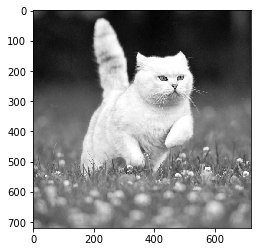

Image rank: 2D
Image shape: (720, 720)


In [6]:

img=Image.open("images/cat.jpg").convert('L')#convert from RGB to Grayscale (L:Luminance)
plt.imshow(img,cmap='gray')
plt.show()

img=np.array(img)
print("Image rank: {0}D".format(img.ndim))
print("Image shape: "+str(img.shape))

It is possible to change the rank of an array using numpy reshape function.
<br>Notice that the number of elements technically didn't change after reshaping, only the dimension changed.

In [7]:
img=np.reshape(img,(img.shape[0],img.shape[1],1))
print("Image rank: {0}D".format(img.ndim))
print("Image shape: "+str(img.shape))

Image rank: 3D
Image shape: (720, 720, 1)


## Keras Models - Neural Network Architecture

Neural Networks (NN) are commonly used for supervised learning and for fitting data samples. They consists for number of neurons arranged in layers. Can be a single layer or multiple layers depending on the complexity of the problem.

### Creating an architecture

To start building a learning model, an architecture of the model should be defined. 

Keras defines the architecture as a set of sequential layers, each layer manipulates the input and delivers the outputs to the next layer. 

In [8]:
from tensorflow.keras import models
from tensorflow.keras import layers
model=models.Sequential()

Layers are added using this command:

In [9]:
#start adding the layers to build an architecture of your model. Dense layer is a neural network layer. 
#The first parameter defines the number of neurons in the layer
#"activation" defines how the data is activated before delivered to the next layer
#"input_shape" only used for the first layer, and defines the shape of the input used. 
# Dense only accept 1D inputs

model.add(layers.Dense(10,
                       activation='relu',
                      input_shape=(1,)))

For simplicity, we will use only layer as input (added in previous command), and one layer as output:

In [10]:
model.add(layers.Dense(1,activation='linear'))

To finalize building a model, we use compile to specifiy how the training error is calculated (loss), and how to optimize the layers to fit the data.

In [11]:
#adam: adaptive moment estimation
#mse: mean square error
model.compile(optimizer='adam',loss='mse')

To print a summary of the network, we can use the following function:

In [12]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                20        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


You have noticed the __activation__ parameter for the layers. Its a function that modulate the output of the layer and makes it non-linear, which as a result, makes the layer more capable to represent the data.
<br>There are several types of activation function:
* __relu__ : or rectified linear, filters the negative values and only outputs the positive values. Commonly used in the input and hidden layers.
* __sigmoid__: smoothes out the result, and maintain the output value between \[0,1\]. Useful for output layers where the results should be restricted to 0~1 value range.
* __tanH__: similar to sigmoid, but the value range is unrestricted. 
* __softmax__: is used as propability distribution function. Mainly used in multi-label classification application.
* __linear__: basically does do any modulation to the input, not good to be used in the hidden layers, but can be used in the output layers in case of regression models.

Here is a visualization of the previous functions (except for softmax, as it works with multiple outputs).

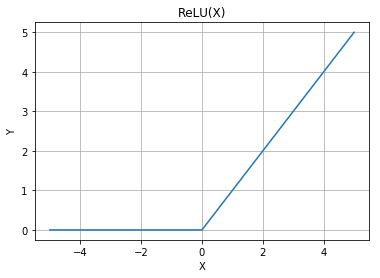

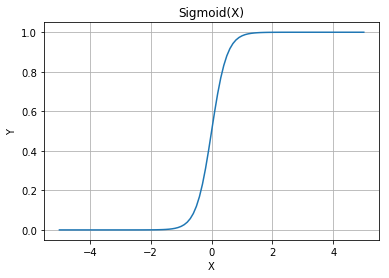

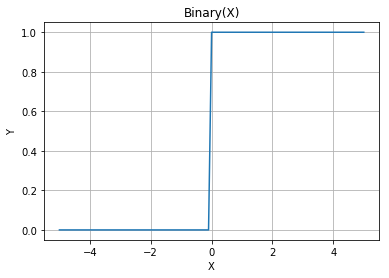

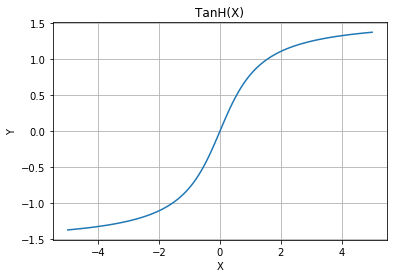

In [13]:
import math
import matplotlib.pyplot as plt

def relu(x):
    return x*(x>=0)

def sigmoid(x):
    return 1.0/(1+np.exp(-x*4))

def linear(x):
    return x

def binary(x):
    return (x>=0)

def tanH(x):
    return np.arctan(x)

X=np.linspace(-5,5,num=101)

Functions=[
          ["ReLU",relu],
          ["Sigmoid",sigmoid],
          ["Binary",binary],
          ["TanH",tanH]
          ]

for f in Functions:
    plt.plot(X,f[1](X))
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title(f[0]+"(X)")
    plt.grid()
    plt.show()

## Supervised Learning 

Supervised Learning refers to the type of ML algorithms that uses training samples consisting of:
* Known Input
* Known Output

It will createa a mppaing function between the inputs and outputs.

Two common uses for Supervised Learning are:
* __Regression__: Basically to estimate a continous function for data points.
* __Classification__: To map data points into discrete categories \['Cats','Dogs'\], \[Zero,One,...,Nine\]

### Linear Regression
The simplest form of supervised learning is linear regression. Its goal is to estimate a _continuous_ function from a set of data points you have.

As an example, we will fit a model for sin wave function:
* Input dimension: 0D (scaler input) 
* Output dimension: 0D (scaler output)

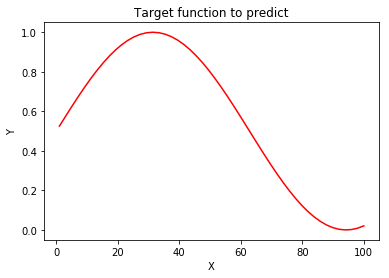

In [14]:
#plot how the function should look like
X_Axis=np.linspace(1,100) #generate 1..100 sequential numbers
Y_Axis=np.sin(X_Axis*0.05)*0.5+0.5 #calculate the sine wave for these inputs


plt.plot(X_Axis,Y_Axis,'r')
plt.title("Target function to predict")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


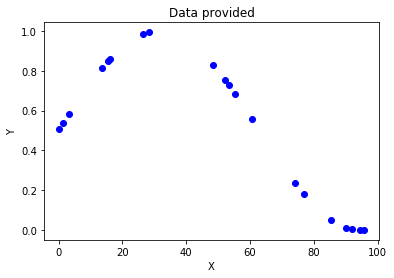

In [15]:
import random
NumberOfSamples=20
random.seed(12)
np.random.seed(12)

#generate input values
X=np.array(np.random.rand(NumberOfSamples)*100)
X=np.sort(X)
#generate output values
Y=np.sin(X*0.05)*0.5+0.5

#Y[5]=0.5

#reshape the inputs to samples
X=np.reshape(X,(len(X),1))
#normalize the inputs 0-->1 
x=X/np.max(X)

plt.plot(X,Y,'bo')
plt.title("Data provided")
plt.xlabel("X")
plt.ylabel("Y")
plt.savefig("samples.png")

In [16]:
#import the required libraries
from tensorflow.keras import models
from tensorflow.keras import layers

#function to build multilayer neural network
def build_model(firstlayer,hiddenlayers=[]):
    model=models.Sequential()
    model.add(layers.Dense(firstlayer, 
                           activation='sigmoid',
                           input_shape=(1,), #number of inputs for this model is 1
                           kernel_initializer='uniform',
                           name="Input"))
    i=0
    for l in hiddenlayers:
        model.add(layers.Dense(l,  #number of neurons in this layer
                               activation='sigmoid',
                               kernel_initializer='uniform',
                               name="Hidden{0}".format(i)))
        i=i+1
        
    model.add(layers.Dense(1,activation='linear',name="Output"))#add output layer
    model.compile(optimizer='adam',loss='mse',metrics=['mae'])#compile the model
    model.summary()#print a summary
    return model

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (Dense)                (None, 32)                64        
_________________________________________________________________
Hidden0 (Dense)              (None, 16)                528       
_________________________________________________________________
Output (Dense)               (None, 1)                 17        
Total params: 609
Trainable params: 609
Non-trainable params: 0
_________________________________________________________________
Fitting iteration:0/10
Mean Squared Error:0.0617498832755


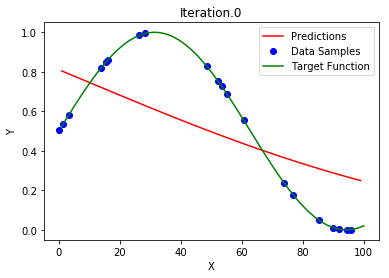

Fitting iteration:1/10
Mean Squared Error:0.0524399143644


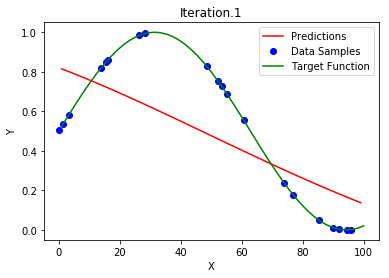

Fitting iteration:2/10
Mean Squared Error:0.0425508656888


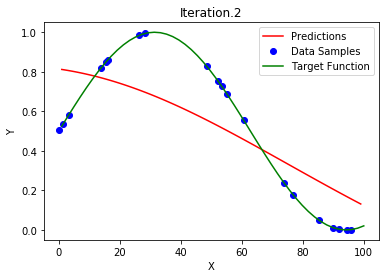

Fitting iteration:3/10
Mean Squared Error:0.0196697963132


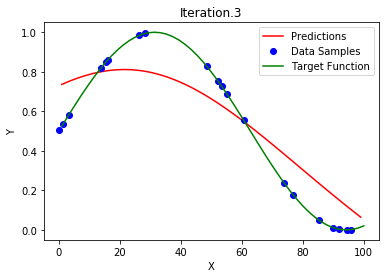

Fitting iteration:4/10
Mean Squared Error:0.00264096272868


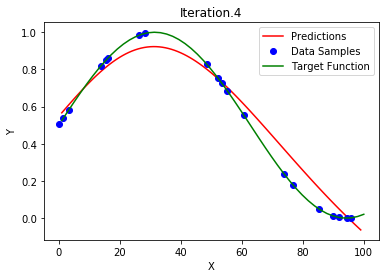

Fitting iteration:5/10
Mean Squared Error:0.00128288703453


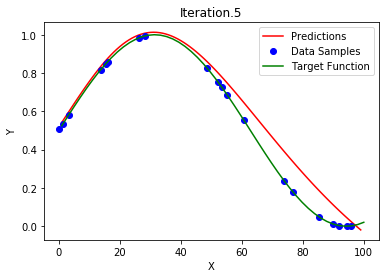

Fitting iteration:6/10
Mean Squared Error:0.000942088092307


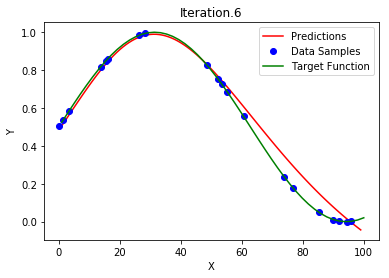

Fitting iteration:7/10
Mean Squared Error:0.00126468531126


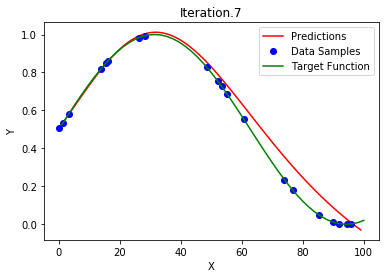

Fitting iteration:8/10
Mean Squared Error:0.000947078464185


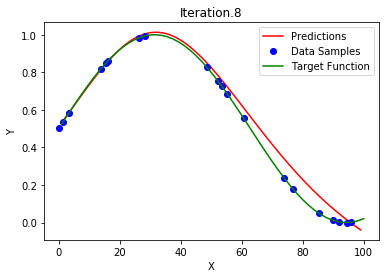

Fitting iteration:9/10
Mean Squared Error:0.000580505329026


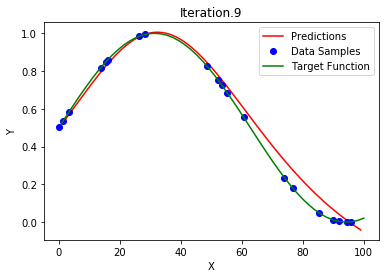

In [18]:

#create a model
#experiment different parameters for the layers, e.g.
# build_model(firstlayer=16,hiddenlayers=[]) <-- No hidden layers
# build_model(firstlayer=16,hiddenlayers=[8]) <-- One hidden layer
# build_model(firstlayer=16,hiddenlayers=[8,4]) <-- Two hidden layers
model=build_model(firstlayer=32,hiddenlayers=[16])
A=np.array(range(1,100))

TotalIteration=10 #total iterations
for i in range(TotalIteration):
    print("Fitting iteration:{0}/{1}".format(i,TotalIteration))
    history=model.fit(x,Y,epochs=100,batch_size=1,verbose=0)#train the network for a number of epochs
    print("Mean Squared Error:{0}".format(history.history['loss'][-1]))
    B=model.predict(A/100.0)#predict the values from 0-->100 (after normalized to 0-->1)
    plt.figure()
    plt.plot(A,B,'r',label="Predictions")#plot predictions
    plt.plot(X,Y,'bo',label="Data Samples")#overlay original data samples
    plt.plot(X_Axis,Y_Axis,'g',label="Target Function")#overlay original data samples
    
    plt.title("Iteration.{0}".format(i))
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.legend()
    plt.savefig("trained_{0}.png".format(i))
    plt.show()
    


When fitting a model, a common problem happens is called as __Overfitting__, which practically means the model _Memorized_ the data and thus is not able to genralize to new data.

There are two main reasons overfitting would occur:
* Model has a too much neurons, which would act as a memory remembering all the samples provided at training.
* Training the model for too long, which would also lead to tightly fitting into the provided samples

To overcome overfitting, you can try different combinations of parameters to reduce the complexity of the model, and also check the training output results iteratively.

***

## Supervised Learning Examples using Processing and Keras

### 2D Point Classifier

This example will show how to use Supervised Learning to classify 2D data points into labels.

<br>Processing Application: [Sample_Classifier2D](./Processing/Sample_Classifier2D/Sample_Classifier2D.pde)
<br>Jupyter Notebook: [PointClassifier](./Python/1.PointClassifier.ipynb)

<img src="Images/goodfit.png" width="50%">


### Hand Written Digits Classifier

This example will show how to use Supervised Learning to classify hand written digits into their numbers.

<br>Processing Application: [Screen_Sketching](./Processing/Screen_Sketching/Screen_Sketching.pde)
<br>Jupyter Notebook: [MNISTClassifier](./Python/2.MNISTClassifier.ipynb)

<img src="Images/HandWritten.png" width="50%">
